In [1]:
# Import base libraries
import pandas as pd
import numpy as np
from scipy.io import arff

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

/Users/kamileyagci/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/kamileyagci/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/kamileyagci/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from

In [2]:
# Load data
data3 = arff.loadarff('data/3year.arff')
df3 = pd.DataFrame(data3[0])

In [3]:
df3['class'] = df3['class'].astype('int64')

In [4]:
df3['class'].value_counts(normalize=True)

0    0.952871
1    0.047129
Name: class, dtype: float64

In [5]:
# Assign target and predictor
y = df3['class']
X = df3.drop('class', axis=1)

In [6]:
# Sepearate data into train and test splist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (8402, 64)
y_train shape =  (8402,)
X_test shape =  (2101, 64)
y_test shape =  (2101,)


In [7]:
# Scale/Normalize the predictor variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [8]:
XGBClassifier().get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [9]:
#Baseline XGBoost

xgb = XGBClassifier(eval_metric='logloss', random_state=42) #'logloss' is default, but specified to stop warning
xgb.fit(X_train, y_train)

print('Data3:\n')
print('Training Data:\n', classification_report(y_train, xgb.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb.predict(X_test)))

Data3:

Training Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      8014
           1       0.98      0.42      0.59       388

    accuracy                           0.97      8402
   macro avg       0.98      0.71      0.79      8402
weighted avg       0.97      0.97      0.97      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1994
           1       0.93      0.36      0.52       107

    accuracy                           0.97      2101
   macro avg       0.95      0.68      0.75      2101
weighted avg       0.97      0.97      0.96      2101



In [34]:
val_counts = df3['class'].value_counts()
ratio_imbalance = val_counts[0]/val_counts[1]
sqrt_ratio_imbalance = np.sqrt(val_counts[0]/val_counts[1])
print('imbalance ratio:', ratio_imbalance)
print('sqrt of imbalance ratio:', sqrt_ratio_imbalance)

imbalance ratio: 20.21818181818182
sqrt of imbalance ratio: 4.496463256625347


In [38]:
#Treat Imbalance, scale_pos_weight = imbalance ratio

xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=20, random_state=42)
xgb.fit(X_train, y_train)

print('Data3, Imbalance addressed, scale_pos_weight = imbalance ratio:\n')
print('Training Data:\n', classification_report(y_train, xgb.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb.predict(X_test)))

Data3, Imbalance addressed, scale_pos_weight = imbalance ratio:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      8014
           1       0.38      0.96      0.54       388

    accuracy                           0.93      8402
   macro avg       0.69      0.94      0.75      8402
weighted avg       0.97      0.93      0.94      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1994
           1       0.34      0.75      0.47       107

    accuracy                           0.91      2101
   macro avg       0.66      0.83      0.71      2101
weighted avg       0.95      0.91      0.93      2101



In [112]:
#Treat Imbalance, scale_pos_weight = sqrt of imbalance ratio

xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=4.5, random_state=42)
xgb.fit(X_train, y_train)

print('Data3, Imbalance addressed, scale_pos_weight = 4.5 (sqrt of imbalance ratio):\n')
print('Training Data:\n', classification_report(y_train, xgb.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb.predict(X_test)))

Data3, Imbalance addressed, scale_pos_weight = 4.5 (sqrt of imbalance ratio):

Training Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8014
           1       0.78      0.69      0.73       388

    accuracy                           0.98      8402
   macro avg       0.88      0.84      0.86      8402
weighted avg       0.98      0.98      0.98      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1994
           1       0.69      0.53      0.60       107

    accuracy                           0.96      2101
   macro avg       0.83      0.76      0.79      2101
weighted avg       0.96      0.96      0.96      2101



In [26]:
def scan_xgb(dataNumber, X_tr, y_tr, X_te, y_te, xgbParams, scanParam, scanList):

    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    #plt.tight_layout(pad=5)
    
    model_scores_list = []
    
    for ax, s in zip(axes.flat, scanList):
        
        xgbParams[scanParam]=s
        
        clf = XGBClassifier(**xgbParams)
          
        clf.fit(X_tr, y_tr)
    
        y_train_pred = clf.predict(X_tr)   
        y_train_prob = clf.predict_proba(X_tr) #Probability estimates for each class
        fpr_train, tpr_train, thresholds_train = roc_curve(y_tr, y_train_prob[:,1])
        auc_train = round(auc(fpr_train, tpr_train),3)
        f1_train = round(f1_score(y_tr, y_train_pred),3)
        recall_train = round(recall_score(y_tr, y_train_pred),3)
        precision_train = round(precision_score(y_tr, y_train_pred),3)
        accuracy_train = round(accuracy_score(y_tr, y_train_pred),3)
        
        y_test_pred = clf.predict(X_te)
        y_test_prob = clf.predict_proba(X_te) #Probability estimates for each class
        fpr_test, tpr_test, thresholds_test = roc_curve(y_te, y_test_prob[:,1])
        auc_test = round(auc(fpr_test, tpr_test),3)
        f1_test = round(f1_score(y_te, y_test_pred),3)
        recall_test = round(recall_score(y_te, y_test_pred),3)
        precision_test = round(precision_score(y_te, y_test_pred),3)
        accuracy_test = round(accuracy_score(y_te, y_test_pred),3)
       
        fit_scores_train = {'Params': f'{scanParam}={s}  Train ',
                        'accuracy': accuracy_train,
                        'precision': precision_train,
                        'recall': recall_train,
                        'f1': f1_train,
                        'auc': auc_train
                       }
    
        fit_scores_test = {'Params': f'Test',
                        'accuracy': accuracy_test,
                        'precision': precision_test,
                        'recall': recall_test,
                        'f1': f1_test,
                        'auc': auc_test
                       }
    
        model_scores_list.append(fit_scores_train)
        model_scores_list.append(fit_scores_test)

    
        ax.plot(fpr_train, tpr_train, lw=2, label=f'Train: acc={accuracy_train}, prec={precision_train}, rec={recall_train}, f1={f1_train}, AUC={auc_train}')
        ax.plot(fpr_test, tpr_test, lw=2, label=f'Test: acc={accuracy_test}, prec={precision_test}, rec={recall_test}, f1={f1_test}, AUC={auc_test}')  
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_yticks([i/20.0 for i in range(21)])
        ax.set_xticks([i/20.0 for i in range(21)])
        ax.set_xlabel('False Positive Rate', fontsize=14)
        ax.set_ylabel('True Positive Rate', fontsize=14)
        ax.set_title(f'ROC Curve for Data {dataNumber}, {scanParam}={s}', fontsize=14)
        ax.legend(loc='auto', fontsize=13)

    model_scores_df = pd.DataFrame(model_scores_list)
    model_scores_df = model_scores_df.set_index('Params')
    #print(model_scores_df)
    
    plt.savefig(f'figures/ROC_Curve_d{dataNumber}_{scanParam}.png')
    
    return model_scores_df
    

,accuracy,precision,recall,f1,auc
Params,,,,,
scale_pos_weight=1 Train,0.973,0.982,0.423,0.591,0.977
Test,0.966,0.929,0.364,0.523,0.926
scale_pos_weight=3 Train,0.978,0.868,0.608,0.715,0.984
Test,0.967,0.794,0.467,0.588,0.928
scale_pos_weight=4.5 Train,0.977,0.780,0.686,0.730,0.984
Test,0.964,0.687,0.533,0.600,0.929
scale_pos_weight=6 Train,0.974,0.706,0.737,0.721,0.985
Test,0.964,0.678,0.551,0.608,0.926
scale_pos_weight=10 Train,0.967,0.597,0.853,0.703,0.984


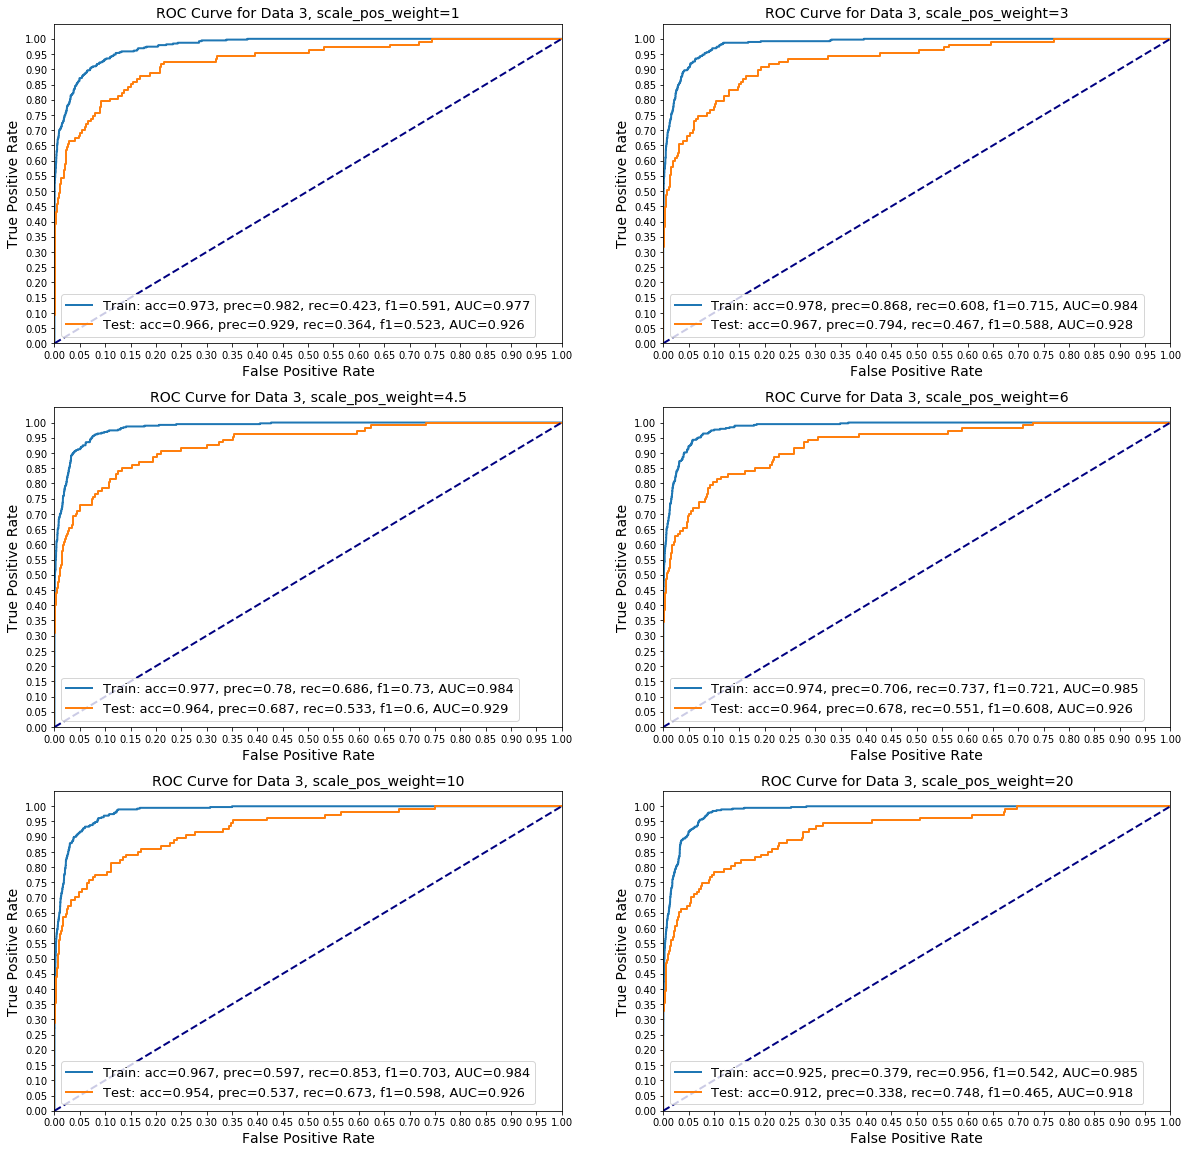

In [25]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42
}

scanParam = 'scale_pos_weight'

scanList = [1, 3, 4.5, 6, 10, 20]

scan_xgb(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)

,accuracy,precision,recall,f1,auc
Params,,,,,
max_depth=1 Train,0.954,0.500,0.018,0.035,0.872
Test,0.950,0.571,0.037,0.070,0.877
max_depth=2 Train,0.964,0.948,0.235,0.376,0.933
Test,0.962,0.912,0.290,0.440,0.909
max_depth=3 Train,0.973,0.982,0.423,0.591,0.977
Test,0.966,0.929,0.364,0.523,0.926
max_depth=4 Train,0.980,0.996,0.572,0.727,0.995
Test,0.970,0.957,0.421,0.584,0.936
max_depth=5 Train,0.989,1.000,0.763,0.865,1.000


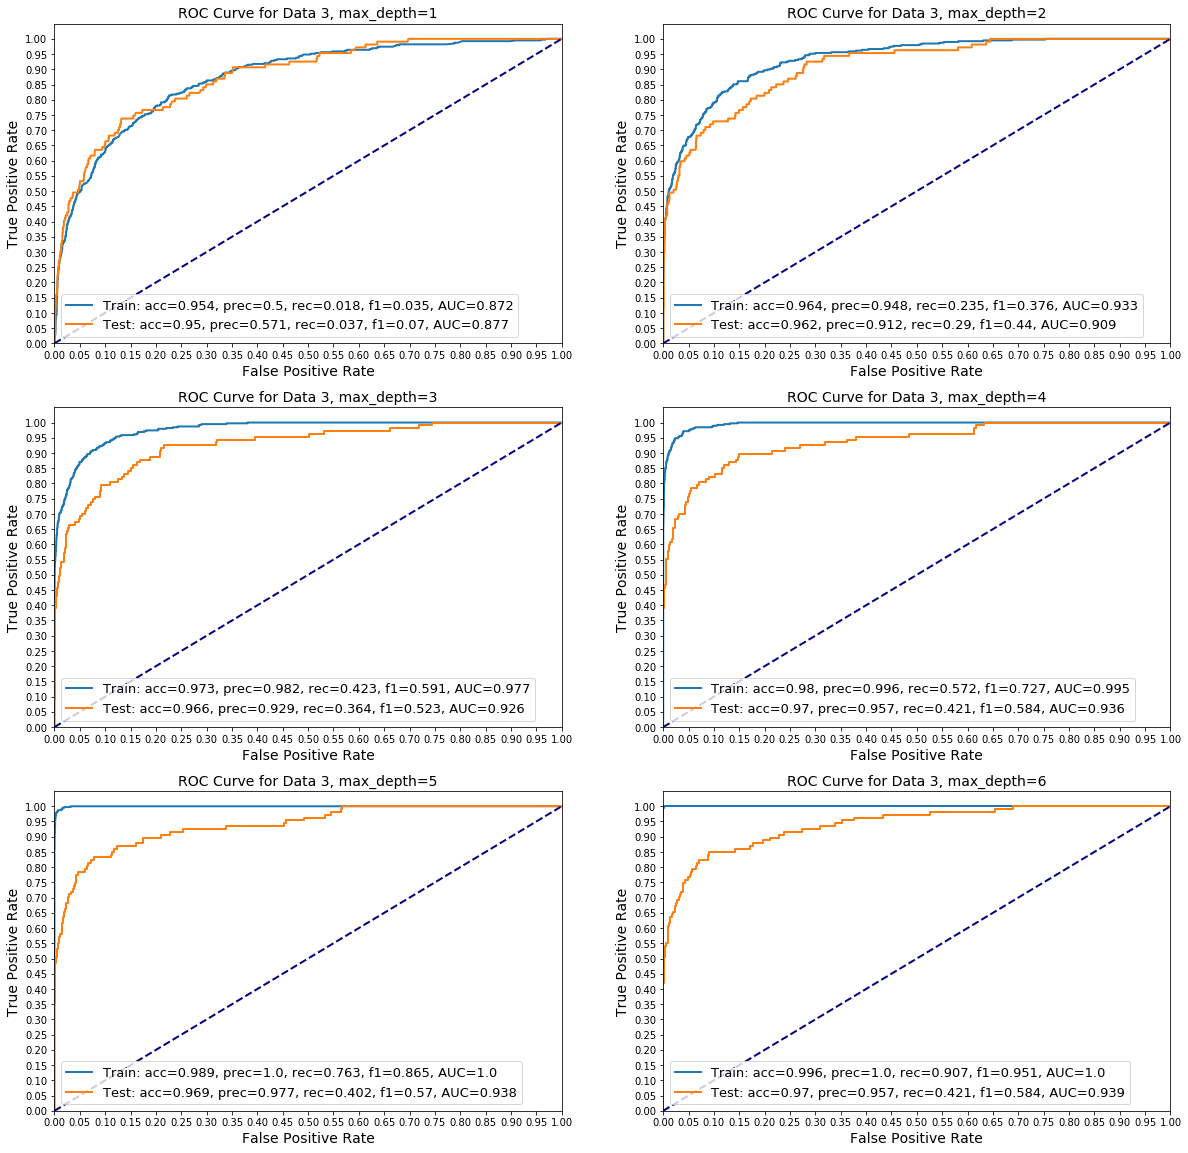

In [27]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42
}

scanParam = 'max_depth'

scanList = [1, 2, 3, 4, 5, 6]

scan_xgb(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)

,accuracy,precision,recall,f1,auc
Params,,,,,
learning_rate=0.05 Train,0.968,0.975,0.307,0.467,0.952
Test,0.966,0.927,0.355,0.514,0.916
learning_rate=0.1 Train,0.973,0.982,0.423,0.591,0.977
Test,0.966,0.929,0.364,0.523,0.926
learning_rate=0.15 Train,0.978,0.990,0.534,0.693,0.989
Test,0.968,0.915,0.402,0.558,0.935
learning_rate=0.2 Train,0.981,0.991,0.601,0.748,0.996
Test,0.968,0.885,0.430,0.579,0.936
learning_rate=0.25 Train,0.986,0.993,0.704,0.824,0.998


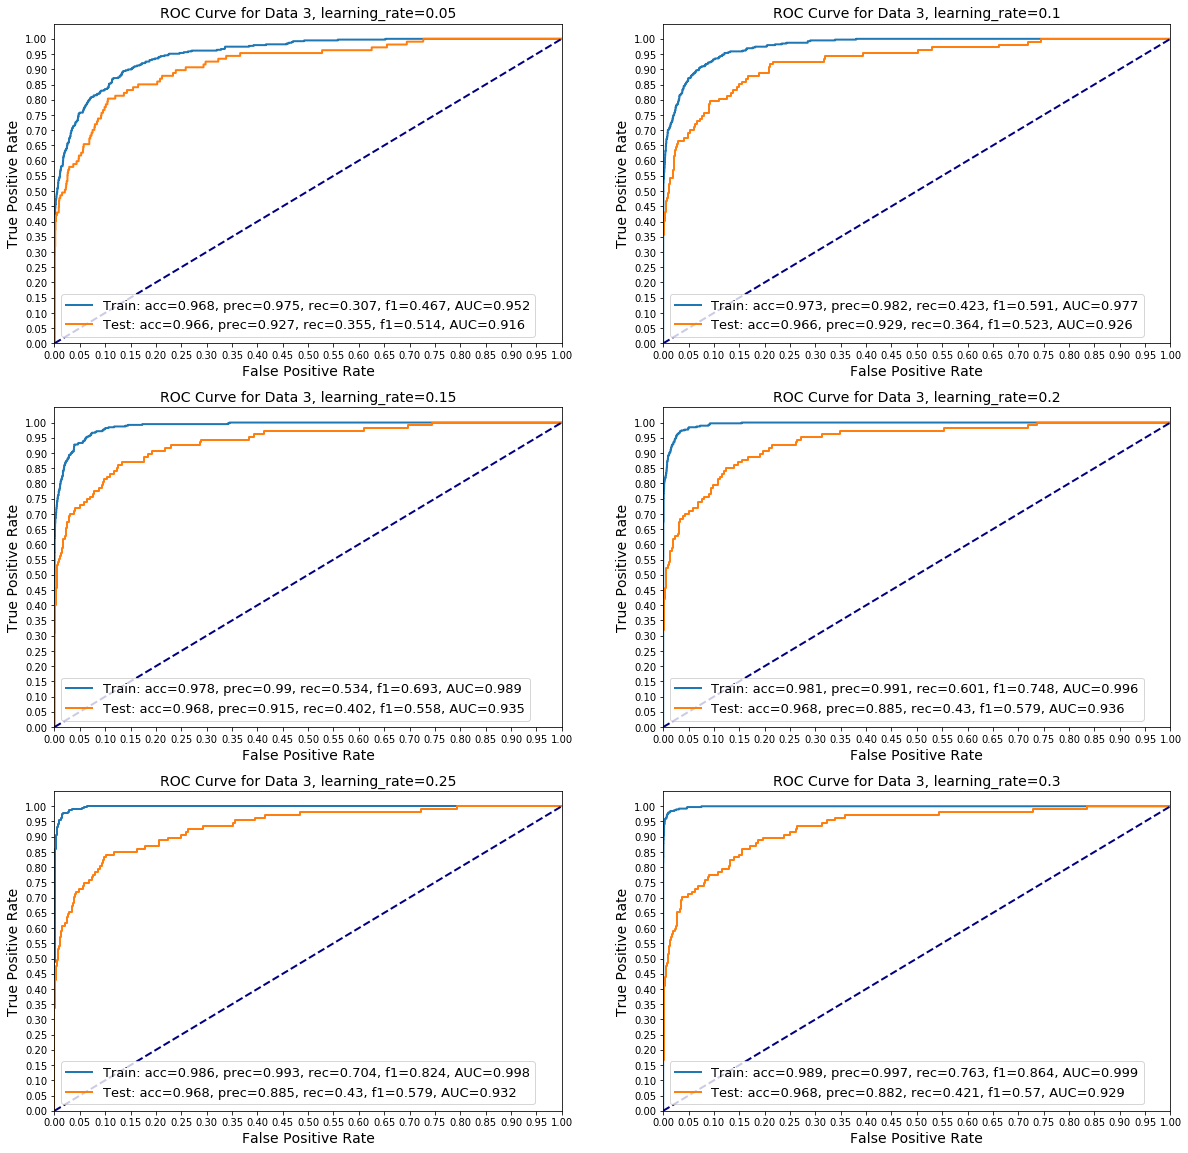

In [28]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42
}

scanParam = 'learning_rate'

scanList = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

scan_xgb(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)

,accuracy,precision,recall,f1,auc
Params,,,,,
reg_lambda=0 Train,0.974,0.989,0.451,0.619,0.981
Test,0.968,0.933,0.393,0.553,0.933
reg_lambda=0.2 Train,0.974,0.988,0.441,0.610,0.982
Test,0.967,0.930,0.374,0.533,0.932
reg_lambda=0.4 Train,0.974,0.983,0.441,0.609,0.979
Test,0.968,0.976,0.383,0.550,0.929
reg_lambda=0.6 Train,0.974,0.983,0.438,0.606,0.980
Test,0.968,0.955,0.393,0.556,0.932
reg_lambda=0.8 Train,0.973,0.982,0.425,0.594,0.977


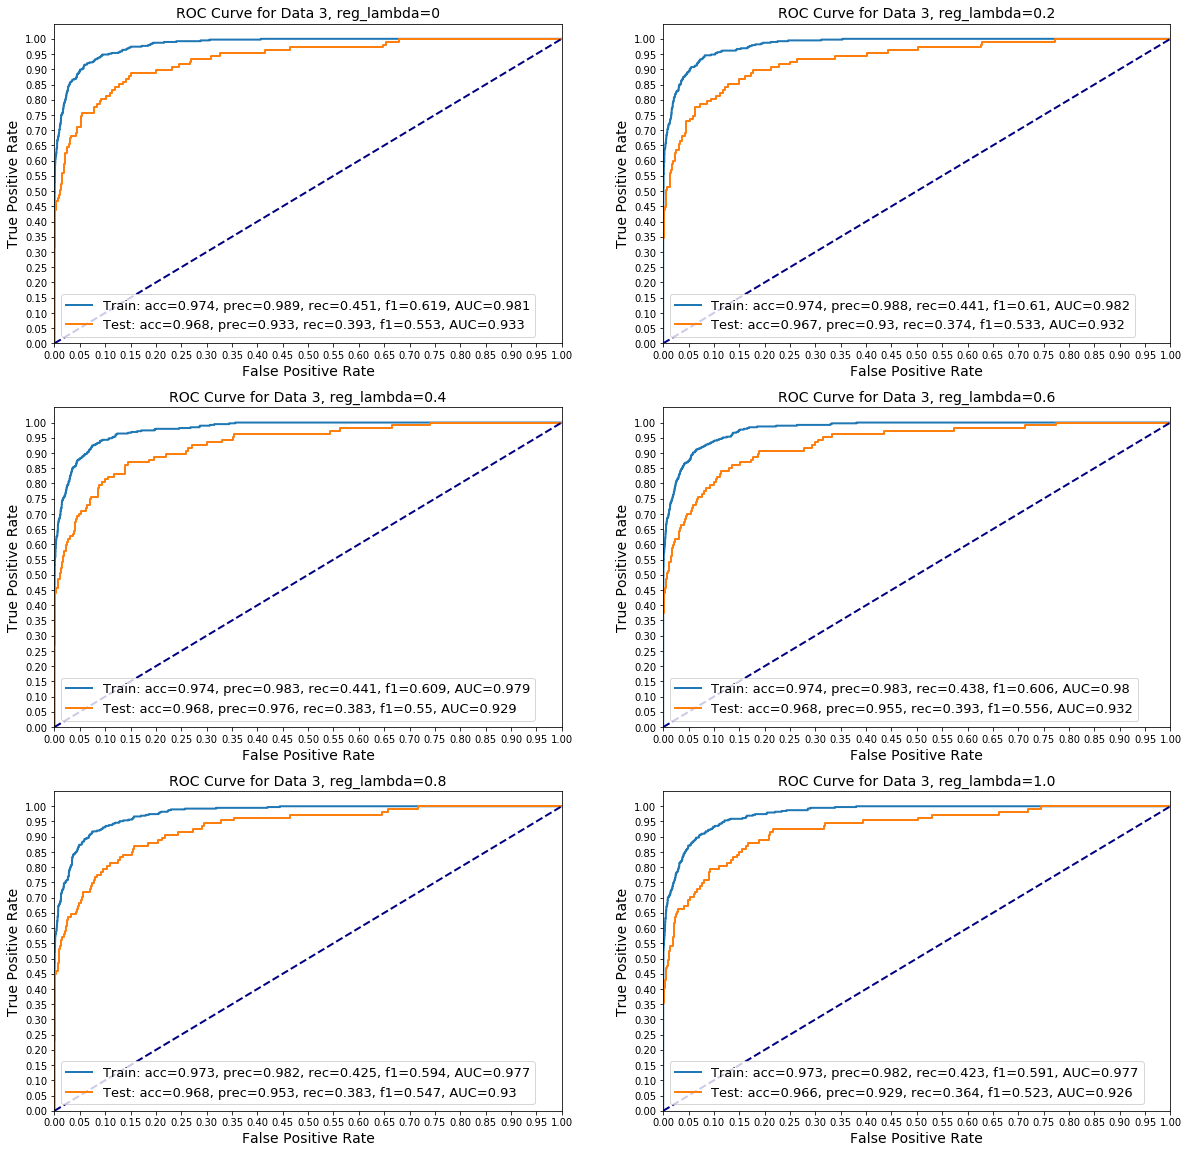

In [29]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'reg_alpha': 0
}

scanParam = 'reg_lambda'

scanList = [0, .2, .4, .6, .8, 1.0]

scan_xgb(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)

,accuracy,precision,recall,f1,auc
Params,,,,,
reg_alpha=0 Train,0.974,0.989,0.451,0.619,0.981
Test,0.968,0.933,0.393,0.553,0.933
reg_alpha=0.2 Train,0.974,0.983,0.454,0.621,0.979
Test,0.968,0.933,0.393,0.553,0.933
reg_alpha=0.4 Train,0.974,0.983,0.451,0.618,0.981
Test,0.968,0.955,0.393,0.556,0.925
reg_alpha=0.6 Train,0.974,0.983,0.443,0.611,0.982
Test,0.969,0.977,0.393,0.560,0.927
reg_alpha=0.8 Train,0.973,0.988,0.425,0.595,0.979


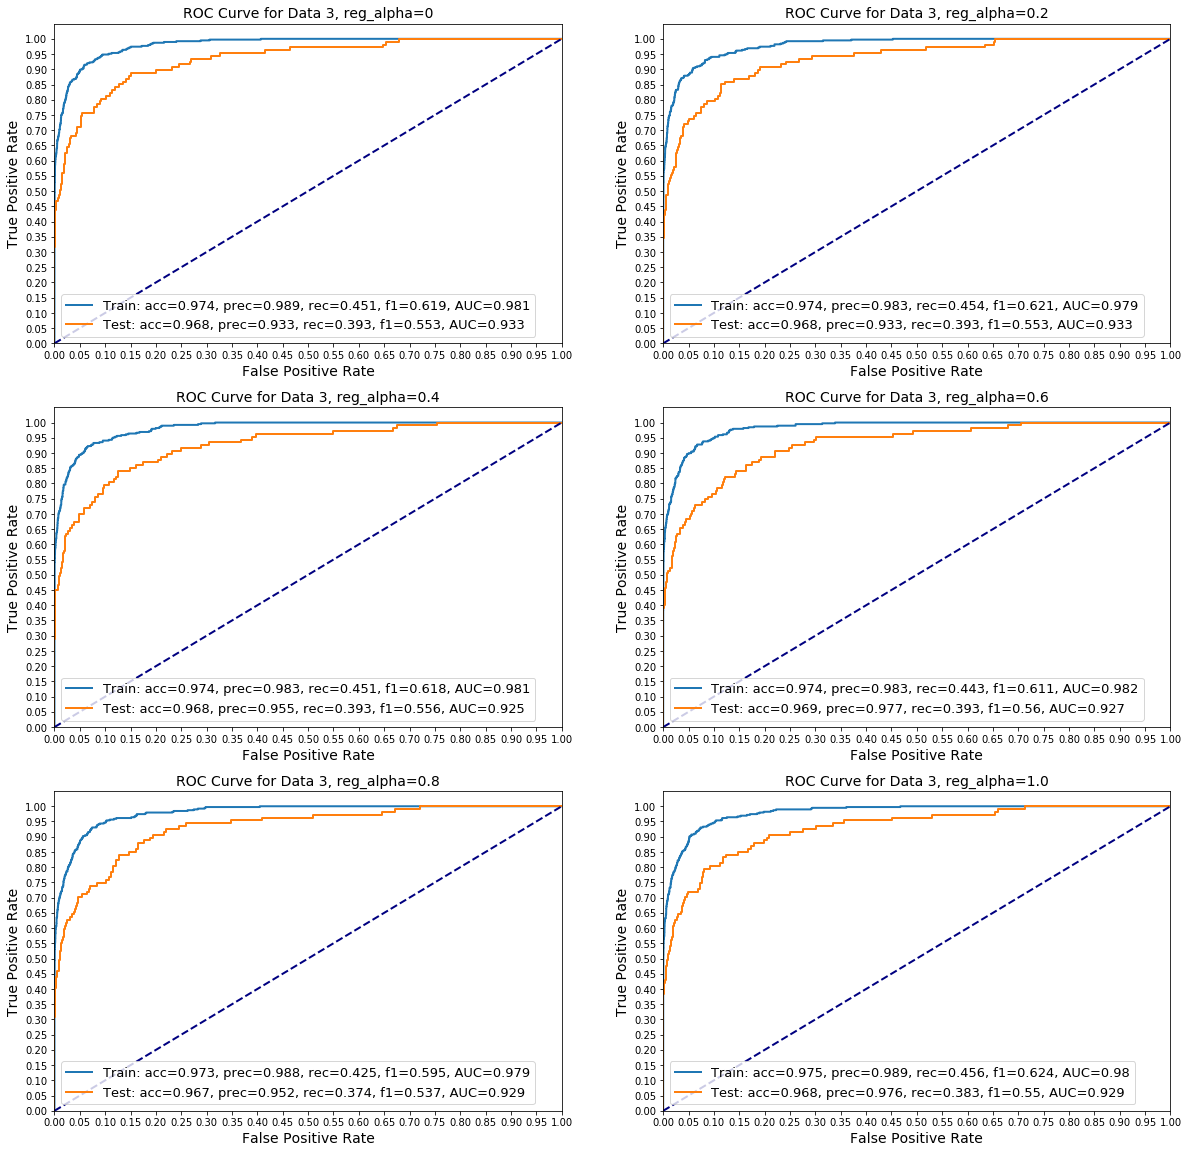

In [30]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'reg_lambda': 0
}

scanParam = 'reg_alpha'

scanList = [0, .2, .4, .6, .8, 1.0]

scan_xgb(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)

,accuracy,precision,recall,f1,auc
Params,,,,,
n_estimators=30 Train,0.966,0.990,0.268,0.422,0.914
Test,0.963,0.895,0.318,0.469,0.899
n_estimators=40 Train,0.967,0.982,0.286,0.443,0.938
Test,0.964,0.919,0.318,0.472,0.908
n_estimators=50 Train,0.968,0.992,0.307,0.469,0.949
Test,0.965,0.947,0.336,0.497,0.913
n_estimators=60 Train,0.969,0.978,0.340,0.505,0.959
Test,0.966,0.950,0.355,0.517,0.920
n_estimators=80 Train,0.971,0.987,0.381,0.550,0.969


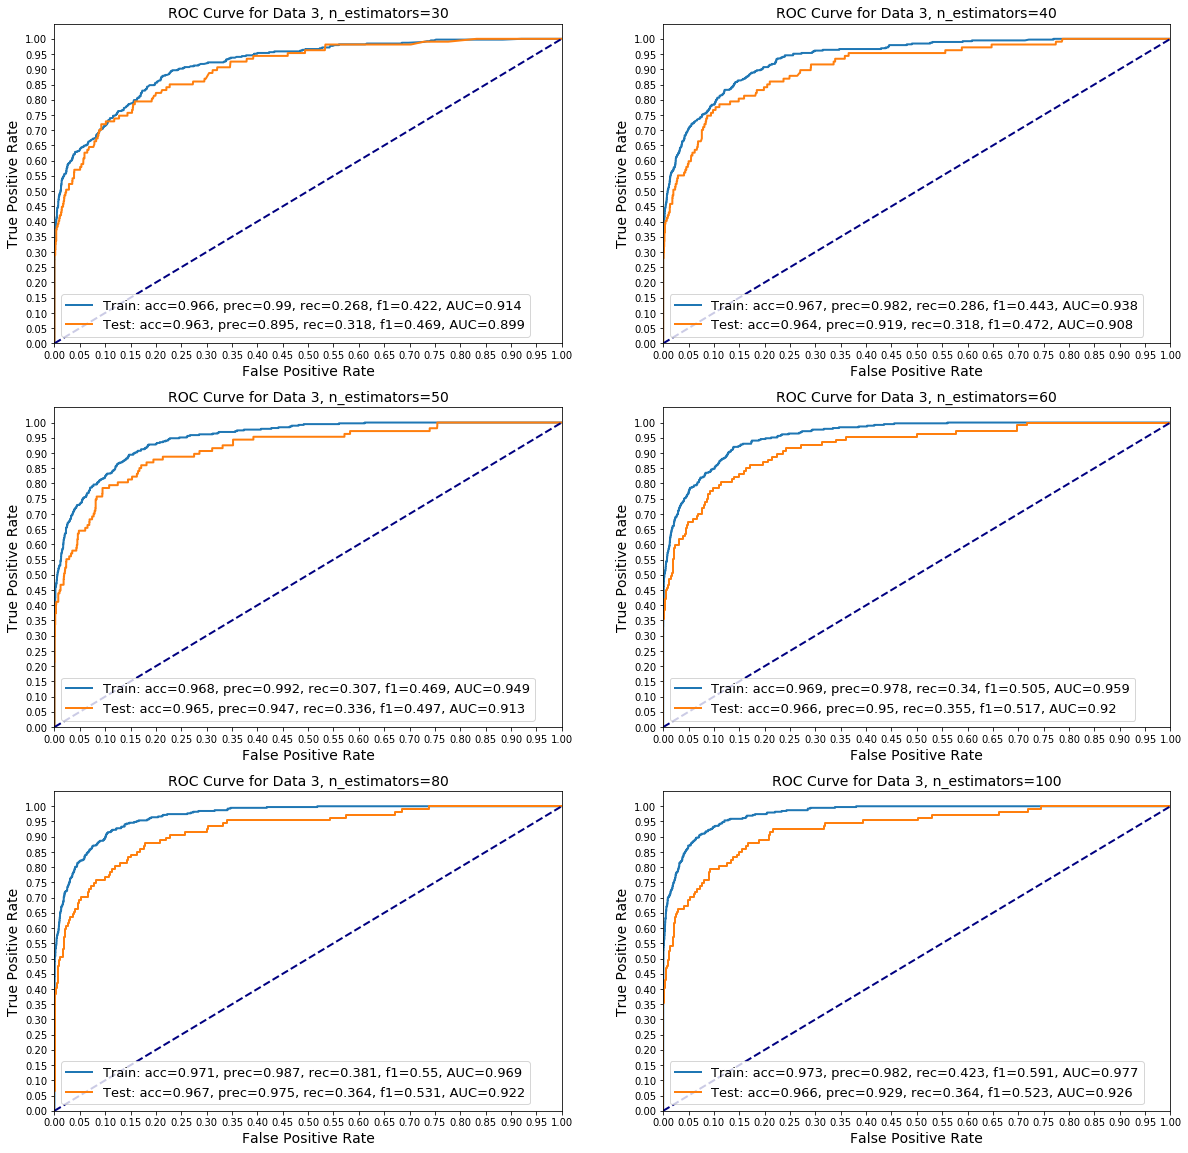

In [32]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
}

scanParam = 'n_estimators'

scanList = [30, 40, 50, 60, 80, 100]

scan_xgb(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)